In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# the imports below only work when this notebook file is directly placed in mlicms2425ex5-groupg
from src.systems.system import LorenzSystem 
from src.systems.utils import *
from src.models.approximator import *
from src.models.utils import *

Part 1: Time-Delay Embedding of a Periodic Signal

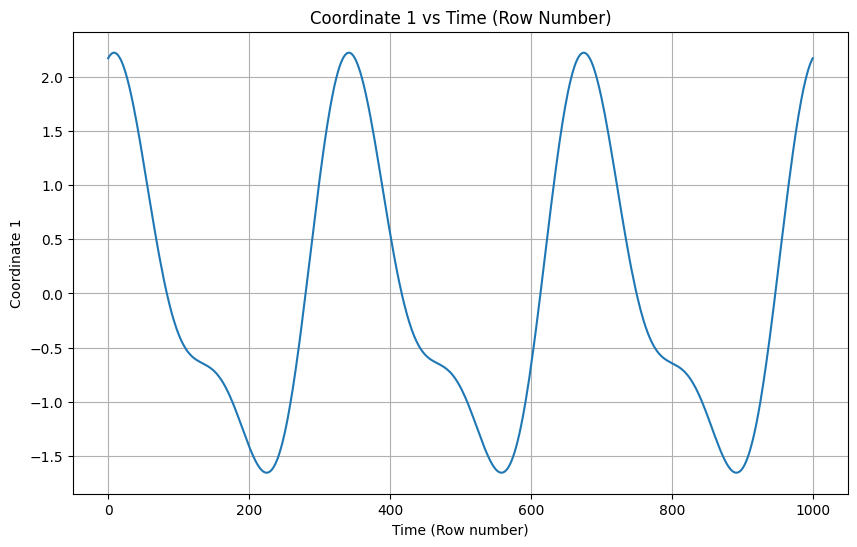

In [2]:
path = './data/periodic.txt'
data = np.loadtxt(path)

# Part 1.1: Plot the first coordinate against time (row number)
plot_coordinate_vs_time(data, delay=0, coordinate_index=0)

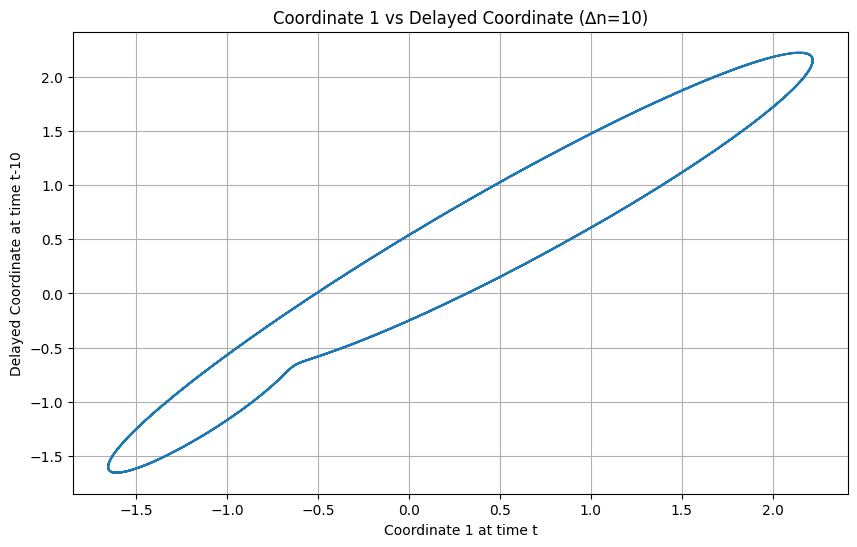

In [3]:
# Part 1.2: Plot the first coordinate against its delayed version (with a delay of Δn = delay)
delay = 10
plot_coordinate_vs_time(data, delay=delay, coordinate_index=0)

Part 2: Testing Takens Theorem on the Lorenz Attractor

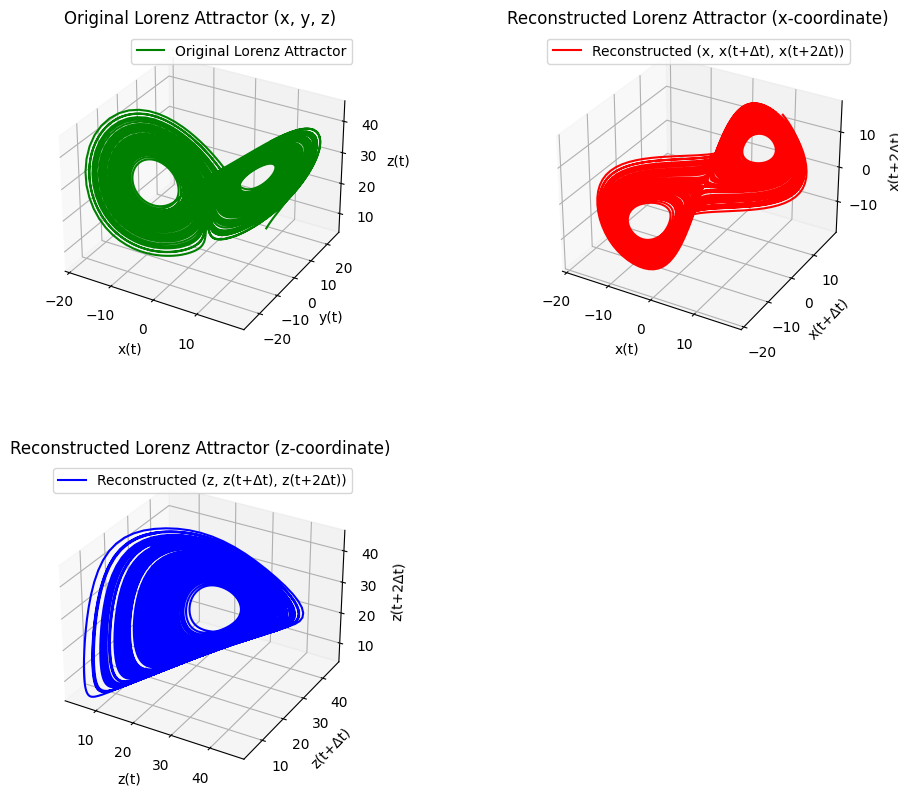

In [4]:
lorenz_system = LorenzSystem()

initial_point = [10, 10, 10]
t_span = (0, 100) 
t_eval = np.linspace(t_span[0], t_span[1], 10000) 

solution = solve_ivp(
    fun=lorenz_system._get_tangent,  
    t_span=t_span,                   
    y0=initial_point,           
    t_eval=t_eval                    
)

delta_t = 10 

x = solution.y[0]
y = solution.y[1]
z = solution.y[2]

plot_lorenz_attractors(x, y, z, delta_t)

Bonus

mse error between diff and diff_predicted is 0.04902173693285728


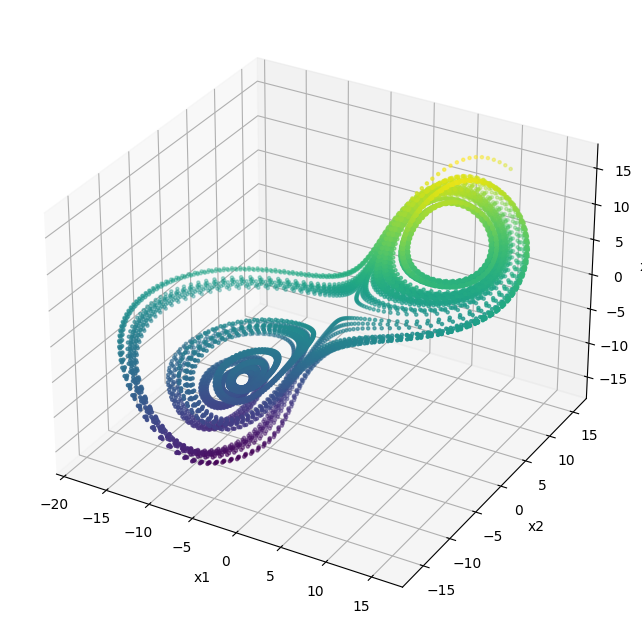

In [5]:
x1 = x[:-2*delta_t].reshape(-1,1)
x2 = x[delta_t:-delta_t].reshape(-1,1)
x3 = x[2*delta_t:].reshape(-1,1)

x_dataset = np.hstack((x1, x2, x3))
x_dataset_next = np.vstack((np.zeros((1,x_dataset.shape[1])), x_dataset))[:-1,:]

diff = (x_dataset_next - x_dataset)[1:,:]

RBF = RBFApproximator()
RBF.L = 15
RBF.eps = 9.5
RBF = RBF.fit(x=x_dataset[1:,:], y=diff)
diff_predicted = RBF.predict(x_dataset[1:,:])

mse_error = ((diff-diff_predicted)**2).sum(1).mean()
print(f"mse error between diff and diff_predicted is {mse_error}")

def func_x(t, y):
    result = RBF.predict(y.reshape(1,-1)).squeeze()
    assert result.shape == y.shape, f"y has shape {y.shape}, result has shape {result.shape}"
    return result

first_data = x_dataset[1,:]

t_span = (0, 10000) 
t_eval = np.linspace(t_span[0], t_span[1], 10000)

sol = solve_ivp(
    fun=func_x,
    t_span=t_span,
    t_eval=t_eval,
    y0=x_dataset[1, :],
)

plot_3d_points((sol.y).T)